<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Natural Language Processing (Spring 2023)</b><br><br>CA4-Q2</i></font></h1>
                </td>
                <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
            </tr>
        </table>
    
</div>
<br>
<font size=3 color="#045F5F">Parham Bicharanlu<br></font><br>
<font size=3 color="#045F5F">810100303<br></font><br>

## Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install hazm
!pip install transformers
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Important libraries and modules**

In [3]:
import pandas as pd
import numpy as np
import torch

from transformers import AutoConfig, AutoTokenizer, AutoModel
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import Dataset

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from transformers import AutoTokenizer, AutoModel, AdamW
from sklearn.metrics import confusion_matrix

from hazm import Normalizer, word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns


from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

Loads the Sentipers dataset

In [4]:
# Load the Sentipers dataset
df = pd.read_excel('/content/drive/MyDrive/NLP_CA4_Q1_dataset/sentipers.xlsx')
df

,text,polarity
0,اینک قصد داریم پرینتر دیگری از پرینترهای لیزری...,neutral
1,پرینتری چند کاره از رده‌ی Entry Level یا سطح م...,neutral
2,به هر صورت اکنون ما در دنیایی زندگی می‌کنیم، ...,neutral
3,به صورتی که توانایی کپی کردن، اسکن، فکس، پر...,neutral
4,به هر صورت معمولا چیزی که بیشتر کاربران از پری...,very good
...,...,...
15678,البته نمی‌توان گفت که سیستم خنک کننده کاملا بی...,good
15679,باتری با وجود تمام سخت افزارهای فوق‌العاده به ...,good
15680,نرم افزار به طور پیش فرض Retina MacBook Pro از...,good
15681,متاسفانه سایر برنامه‌ها بر روی این صفحه نمایش ...,bad


Visualizes the distribution of polarity labels.

<Axes: >

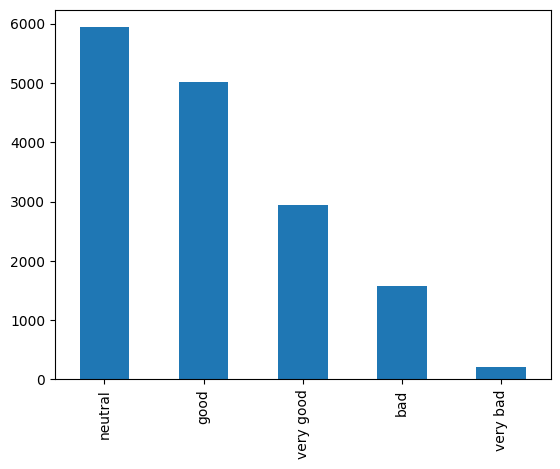

In [5]:
df['polarity'].value_counts().plot(kind='bar')

In [6]:
df

,text,polarity
0,اینک قصد داریم پرینتر دیگری از پرینترهای لیزری...,neutral
1,پرینتری چند کاره از رده‌ی Entry Level یا سطح م...,neutral
2,به هر صورت اکنون ما در دنیایی زندگی می‌کنیم، ...,neutral
3,به صورتی که توانایی کپی کردن، اسکن، فکس، پر...,neutral
4,به هر صورت معمولا چیزی که بیشتر کاربران از پری...,very good
...,...,...
15678,البته نمی‌توان گفت که سیستم خنک کننده کاملا بی...,good
15679,باتری با وجود تمام سخت افزارهای فوق‌العاده به ...,good
15680,نرم افزار به طور پیش فرض Retina MacBook Pro از...,good
15681,متاسفانه سایر برنامه‌ها بر روی این صفحه نمایش ...,bad


<Axes: >

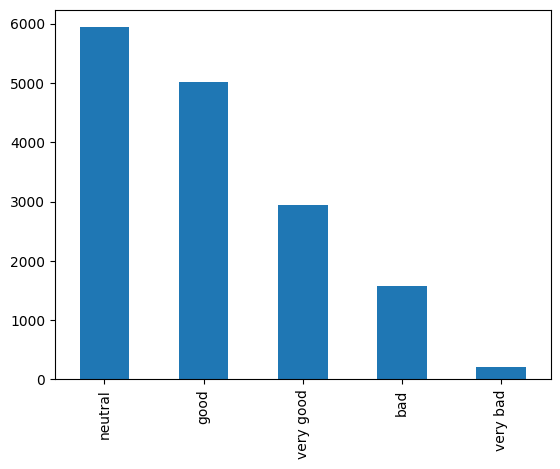

In [7]:
df['polarity'].value_counts().plot(kind='bar')

In [8]:
df = df.sample(frac=0.2, random_state=1)
df

,text,polarity
13721,امروز تحويل گرفتم تا حالا عالي بوده.,very good
12516,در کل ازش راضيم.,good
1301,من الان چند روز اين گوشي رو خريدم از ديجي کال...,good
5037,انتخاب خيلي سخت شده!,neutral
7703,پردازنده‌ی Corei7 که قدرتمندترین آن‌هاست، پرد...,very good
...,...,...
11354,تمامی این قابلیت‌ها در کنار طراحی مناسب و البت...,good
3906,تقریبا همه ی این عملکرد خوب در فیلم برداری شرا...,good
4544,همچنین این تبلت دارای سرویس DLNA نیز، است که ...,neutral
10791,براي اطلاعات بيشتر ميتونيد به وب سايت رسمي فوج...,neutral


<Axes: >

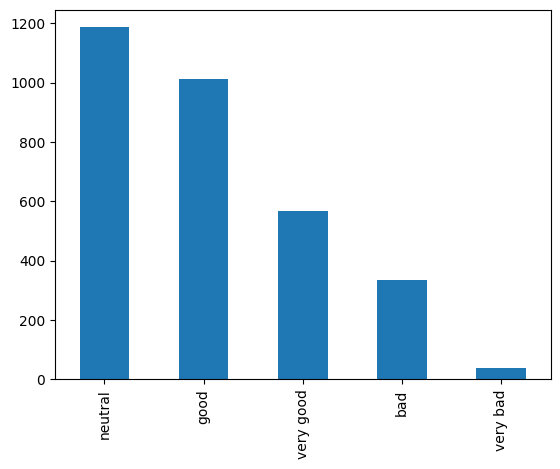

In [9]:
df['polarity'].value_counts().plot(kind='bar')

**Text Preprocessing**

In [10]:
er = ("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
     "]+")

Using hazm to Preproces comments. and after that remove emoticons, symbols, flgs and other unwanted characters.

In [11]:
punctuation = "?.؟!،,"
normalizer = Normalizer()
def preprocessing(item):
    output = normalizer.normalize(item)
    output = output.replace("\_", "\u200c")
#     output = output.replace("\u200c", "")
    output = re.sub(r"LINK([^ ])*|TAG|ID|\-|@|LINK|[A-Za-z]", "", output)
    for i in punctuation:
        p = "\\" + i + "{2,}"
        output = re.sub(p, i, output)
#     output = re.sub("\?|\.|\؟|\!|\،|\,", "", output)
    emoj = re.compile(er)
    #or i in emoj.findall(output):
        #allemojies.add(i)
    output = re.sub("\s+", " ", output).strip()
    return output

df['text'] = df['text'].apply(preprocessing)

In [12]:
df

,text,polarity
13721,امروز تحویل گرفتم تا حالا عالی بوده.,very good
12516,در کل ازش راضیم.,good
1301,من الان چند روز این گوشی رو خریدم از دیجی کالا...,good
5037,انتخاب خیلی سخت شده!,neutral
7703,پردازنده‌ی ۷ که قدرتمندترین آن‌هاست، پردازنده‌...,very good
...,...,...
11354,تمامی این قابلیت‌ها در کنار طراحی مناسب و البت...,good
3906,تقریبا همه‌ی این عملکرد خوب در فیلم‌برداری شرا...,good
4544,همچنین این تبلت دارای سرویس نیز، است که به کمک...,neutral
10791,برای اطلاعات بیشتر میتونید به وب‌سایت رسمی فوج...,neutral


## Section 1
Prepares the Sentipers dataset for training, validation, and testing by converting text data to PyTorch tensors and creating data loaders.

In [13]:
polarity_mapping = {'very bad': 0, 'bad': 1, 'neutral': 2, 'good': 3, 'very good': 4}

# Convert the values in the 'Text' column using the mapping dictionary
df['polarity'] = df['polarity'].replace(polarity_mapping, inplace=False)

In [14]:
# Split the data into train, validation, and test sets
train_x, x, train_y, y = train_test_split( df["text"], df["polarity"], test_size=0.2, random_state=10)
val_x, test_x, val_y, test_y = train_test_split( x, y, test_size=0.5, random_state=10)


In [15]:
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/LaBSE")

train_data = tokenizer(list(train_x), truncation=True, padding=True)
val_data = tokenizer(list(val_x), truncation=True, padding=True)
test_data = tokenizer(list(test_x), truncation=True, padding=True)

In [16]:
type(train_y)

pandas.core.series.Series

In [17]:
# Convert the data to PyTorch tensors
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_data["input_ids"]),
    torch.tensor(train_data["attention_mask"]),
    torch.tensor(train_y.tolist())
)
val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(val_data["input_ids"]),
    torch.tensor(val_data["attention_mask"]),
    torch.tensor(val_y.tolist())
)
test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_data["input_ids"]),
    torch.tensor(test_data["attention_mask"]),
    torch.tensor(test_y.tolist())
)

In [18]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=8)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=8)

# Section 2

**LaBSE model**

In [19]:

# Define the model
# Define the model architecture
class LaBSE_sentiment(nn.Module):
    def __init__(self):
        super(LaBSE_sentiment, self).__init__()
        self.labse = AutoModel.from_pretrained("sentence-transformers/LaBSE")
        self.linear1 = nn.Linear(self.labse.config.hidden_size, 5)  
        self.dropout = nn.Dropout(0.15)
                                  
    def forward(self, ids, mask):
        out = self.labse(input_ids=ids, attention_mask=mask)
        out = out.pooler_output
        out = self.dropout(out)

        out= self.linear1(out)

        return out

In [20]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


**Finetune**

In [21]:
import torch
import matplotlib.pyplot as plt

def finetune(epochs, train_dataloader, valid_dataloader, model, loss_fn, optimizer, device, name_plot):
    train_loss_history = []
    train_accuracy_history = []
    valid_loss_history = []
    valid_accuracy_history = []
    
    running_loss = 0.0
    total_samples = 0
    correct_predictions = 0
    
    for epoch in range(epochs):
        model.to(device)
        model.train()
        
        for i, batch in enumerate(train_dataloader):
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)
            
            optimizer.zero_grad()
            
            outputs = model(ids=input_ids, mask=attention_mask)
            logits = outputs

            _, predicted_labels = torch.max(logits, 1)
            correct_predictions += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)
            
            loss = loss_fn(logits, labels)
            running_loss += loss.item()
            
            loss.backward()
            optimizer.step()
            
        # Print accuracy and loss after each epoch
        accuracy = correct_predictions / total_samples * 100
        avg_loss = running_loss / len(train_dataloader)
        print(f"Epoch: {epoch+1}, Accuracy: {accuracy:.2f}%, Loss: {avg_loss:.4f}")
        train_loss_history.append(avg_loss)
        train_accuracy_history.append(accuracy)
        running_loss = 0.0
        total_samples = 0
        correct_predictions = 0
        
        # Evaluate the model on the validation set after each epoch
        model.eval()
        valid_loss = 0.0
        valid_samples = 0
        valid_correct_predictions = 0
        
        with torch.no_grad():
            for valid_batch in valid_dataloader:
                valid_input_ids = valid_batch[0].to(device)
                valid_attention_mask = valid_batch[1].to(device)
                valid_labels = valid_batch[2].to(device)
                
                valid_outputs = model(ids=valid_input_ids, mask=valid_attention_mask)
                valid_logits = valid_outputs
                
                _, valid_predicted_labels = torch.max(valid_logits, 1)
                valid_correct_predictions += (valid_predicted_labels == valid_labels).sum().item()
                valid_samples += valid_labels.size(0)
                
                valid_batch_loss = loss_fn(valid_logits, valid_labels)
                valid_loss += valid_batch_loss.item()
        
        valid_accuracy = valid_correct_predictions / valid_samples * 100
        avg_valid_loss = valid_loss / len(valid_dataloader)
        print(f"Epoch: {epoch+1}, Validation Accuracy: {valid_accuracy:.2f}%, Validation Loss: {avg_valid_loss:.4f}\n")
        valid_loss_history.append(avg_valid_loss)
        valid_accuracy_history.append(valid_accuracy)
    
    # Plotting the training and validation loss and accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), train_loss_history, label='Training Loss')
    plt.plot(range(1, epochs+1), valid_loss_history, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), train_accuracy_history, label='Training Accuracy')
    plt.plot(range(1, epochs+1), valid_accuracy_history, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.savefig('training_plot_' + name_plot + '.png')
    plt.show()


In [22]:
model = LaBSE_sentiment()
loss_fn = nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(),lr= 0.0001)


Epoch: 1, Accuracy: 58.47%, Loss: 1.0188
Epoch: 1, Validation Accuracy: 64.65%, Validation Loss: 0.9014

Epoch: 2, Accuracy: 69.27%, Loss: 0.7844
Epoch: 2, Validation Accuracy: 67.52%, Validation Loss: 0.8094

Epoch: 3, Accuracy: 74.77%, Loss: 0.6620
Epoch: 3, Validation Accuracy: 65.29%, Validation Loss: 0.8361

Epoch: 4, Accuracy: 79.39%, Loss: 0.5387
Epoch: 4, Validation Accuracy: 67.20%, Validation Loss: 1.0558

Epoch: 5, Accuracy: 82.38%, Loss: 0.4537
Epoch: 5, Validation Accuracy: 66.88%, Validation Loss: 0.9765



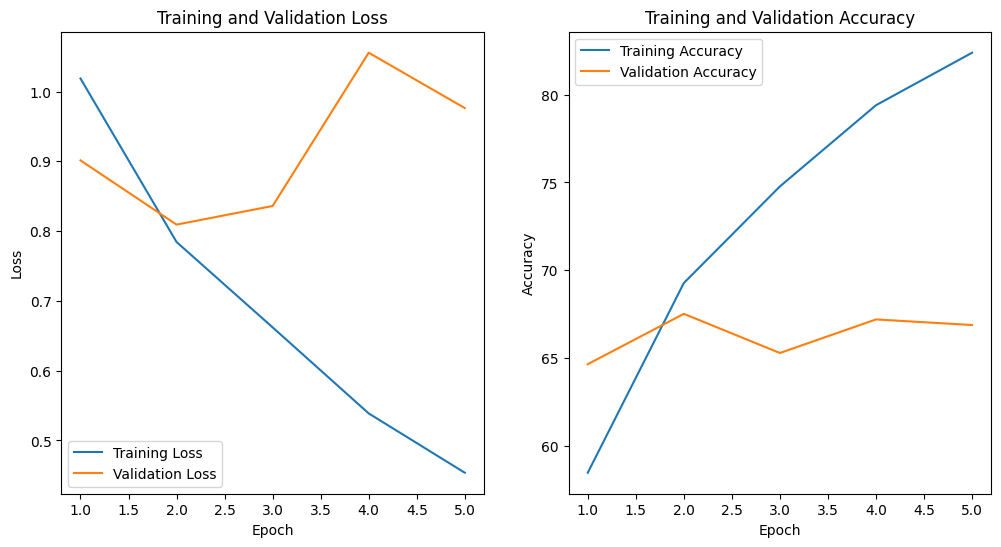

In [23]:
name_plot = 'LaBSE_sentipers'
finetune(5, train_dataloader, valid_dataloader, model, loss_fn, optimizer, device, name_plot)

# Section 3

In [24]:
# Evaluation on the test set
import seaborn as sns
model.eval()
test_loss = 0.0
test_samples = 0
test_correct_predictions = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for test_batch in test_dataloader:
        test_input_ids = test_batch[0].to(device)
        test_attention_mask = test_batch[1].to(device)
        test_labels = test_batch[2].to(device)
        
        test_outputs = model(ids=test_input_ids, mask=test_attention_mask)
        test_logits = test_outputs
        
        _, test_predicted_labels = torch.max(test_logits, 1)
        test_correct_predictions += (test_predicted_labels == test_labels).sum().item()
        test_samples += test_labels.size(0)
        
        test_batch_loss = loss_fn(test_logits, test_labels)
        test_loss += test_batch_loss.item()
        
        true_labels.extend(test_labels.tolist())
        predicted_labels.extend(test_predicted_labels.tolist())

test_accuracy = test_correct_predictions / test_samples * 100
avg_test_loss = test_loss / len(test_dataloader)

test_f1_score = f1_score(true_labels, predicted_labels, average='weighted')
test_precision = precision_score(true_labels, predicted_labels, average='weighted')
test_recall = recall_score(true_labels, predicted_labels, average='weighted')

print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test F1 Score: {test_f1_score:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print("Test Confusion Matrix:")



Test Accuracy: 69.43%
Test Loss: 1.0294
Test F1 Score: 0.6944
Test Precision: 0.6987
Test Recall: 0.6943
Test Confusion Matrix:


# Section 4

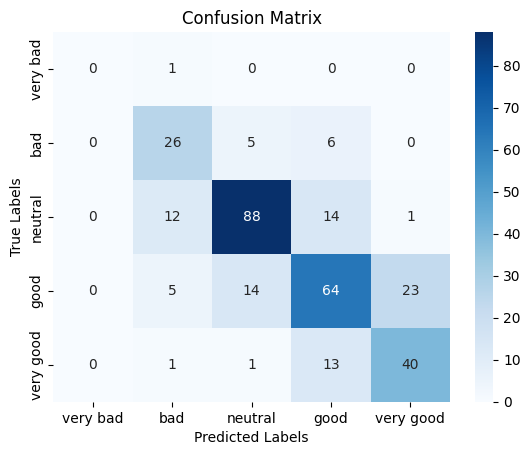

In [25]:
test_confusion_matrix = confusion_matrix(true_labels, predicted_labels)

classes = ['very bad', 'bad', 'neutral', 'good', 'very good']

fig, ax = plt.subplots()

# Create heatmap
sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.savefig('Confusion_Matrix_' + name_plot + '.png')# Show the plot

## Section 5

In [26]:
class BertDataset(Dataset):
    def __init__(self, tokenizer,max_length,df):
        super(BertDataset, self).__init__()
        self.train_csv=df
        self.tokenizer=tokenizer
        self.labels=self.train_csv['label'].values
        self.max_length=max_length
        
    def __len__(self):
        return len(self.train_csv)
    
    def __getitem__(self, index):
        
        text1 = self.train_csv.iloc[index,0]
        inputs = self.tokenizer.encode_plus(
            text1 ,
            None,
            pad_to_max_length=True,
            add_special_tokens=True,
            return_attention_mask=True,
            max_length=self.max_length,
        )
        input_ids = inputs["input_ids"]
        token_type_ids = inputs["token_type_ids"]
        attention_mask = inputs["attention_mask"]
        return {
            'input_ids': torch.tensor(input_ids, dtype=torch.long),
            'attention_mask': torch.tensor(attention_mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'target': torch.tensor(self.labels[index], dtype=torch.long)
            }

In [27]:
class model_ZSL(nn.Module):
    def __init__(self, model, num_classes):
        super(model_ZSL, self).__init__()
        self.model=model
        self.model=self.model.to(device)
        self.softmax = nn.Softmax(dim=1)  
    
    def forward(self,ids,mask,token_type_ids):
        o2= self.model(ids = ids,mask=mask)
        o2 = self.softmax(o2)

        return o2


In [28]:
def predict(testloader,model):
  all_predictions = []
  all_targets = []
  with torch.no_grad():
    loop_val = tqdm(enumerate(testloader, 1),total=len(testloader),
                    desc="val",position=0,leave=True,)
    for batch, dl in loop_val:
      input_ids=dl['input_ids']
      token_type_ids=dl['token_type_ids']
      attention_mask= dl['attention_mask']
      labels=dl['target']

      input_ids=input_ids.to(device)
      token_type_ids=token_type_ids.to(device)
      attention_mask=attention_mask.to(device)
      labels=labels.to(device)

      labels_pred=model(
          ids=input_ids,
          mask=attention_mask,
          token_type_ids=token_type_ids)
      _, predicted = torch.max(labels_pred, 1)

      # Append predicted labels and true labels to the lists
      all_predictions.extend(predicted.tolist())
      all_targets.extend(labels.tolist())
  return all_predictions,all_targets



#### Read Snappfood Data and run the model

In [29]:
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/LaBSE")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### ReLoad the model from Part 1



In [30]:
model = LaBSE_sentiment().to(device)



FileNotFoundError: ignored

In [43]:
snappfood_data = pd.read_csv("/content/drive/MyDrive/NLP_CA4_Q1_dataset/snapfood_testset.csv")

snappfood_data['label'] = snappfood_data['label'].replace({'SAD': 0, 'HAPPY': 1})

new_data = BertDataset(tokenizer, max_length=100,df=snappfood_data)
test_loader =DataLoader(dataset=new_data,batch_size=128)

# Add a softmax layer to the first model
model_modified=model_ZSL(model,2)

y_pred,y_test=predict(test_loader,model_modified)

val: 100%|██████████| 55/55 [00:37<00:00,  1.45it/s]


# Section 6

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

y_pred = [0 if label < 2 else 1 for label in y_pred]


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




Accuracy: 0.4918571428571429
Precision: 0.4934767681391623
Recall: 0.616
F1 Score: 0.5479730588384801


# Section 7

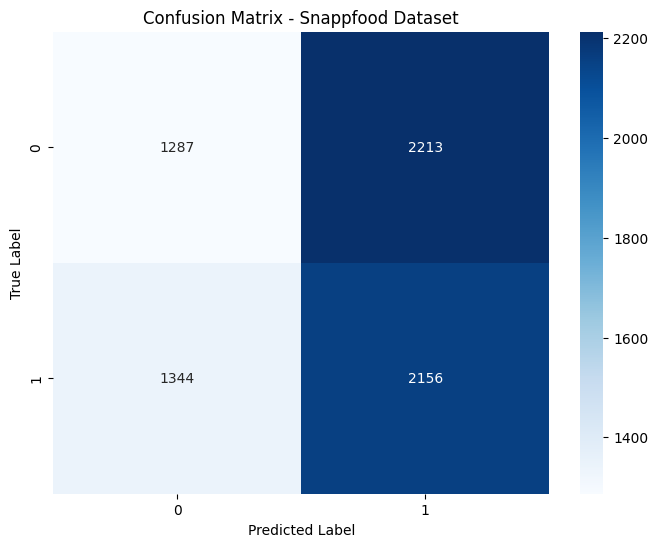

In [46]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Snappfood Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('confusion_matrix_snapfood.png')
plt.show()